You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.

Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed

-- 2 building_windows_non_float_processed

-- 3 vehicle_windows_float_processed

-- 4 vehicle_windows_non_float_processed (none in this database)

-- 5 containers

-- 6 tableware

-- 7 headlamps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [2]:
#Creating Training and Testing dataframes

train_df = pd.read_csv("/content/Assignment10_trainKNN.txt", header=None)
train_df.columns= ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type_of_Glass"]

train_df = train_df.drop('ID', axis=1) # Drop ID since irrelevant to predictions
#train_df.head()

test_df = pd.read_csv("/content/Assignment10_testKNN.txt", header=None) 
test_df.columns = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type_of_Glass"]
test_df = test_df.drop('ID', axis=1)
#test_df.head()



In [3]:
def standardize (df):
    for col in df.columns[:-1]: 
      df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [4]:
train = standardize(train_df)
test = standardize(test_df)
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_Glass
0,0.888537,0.338119,1.242977,-0.720654,-1.120263,-0.682898,-0.113060,-0.33849,-0.581932,1
1,-0.224221,0.657345,0.603903,-0.191863,0.123880,-0.058551,-0.760269,-0.33849,-0.581932,1
2,-0.692234,0.197659,0.568000,0.174223,0.464382,-0.192340,-0.795443,-0.33849,-0.581932,1
3,-0.207857,-0.210950,0.668529,-0.334230,-0.033275,0.075237,-0.485909,-0.33849,-0.581932,1
4,-0.286405,-0.134335,0.618265,-0.435920,0.582248,0.045506,-0.591432,-0.33849,-0.581932,1


In [5]:
X_train = train.iloc[: , :-1]
Y_train = train.iloc[: , -1]

X_test = test.iloc[: , :-1]
Y_test = test.iloc[: , -1]

In [6]:
best_k=0
bestcross_val_score = 0

for i in range(1,11):
  knn = KNeighborsClassifier(i) #initialising the model

  knn.fit(X_train, Y_train) # training the model
  
  print("K value: " , i, "\tTrain Accuracy:",knn.score(X_train, Y_train), "\tVal Accuracy: ", np.mean(cross_val_score(knn, X_train, Y_train, cv=6, scoring="accuracy"))) 
  if bestcross_val_score < np.mean(cross_val_score(knn, X_train, Y_train, cv=6, scoring="accuracy")):
    bestcross_val_score = np.mean(cross_val_score(knn, X_train, Y_train, cv=6, scoring="accuracy"))
    best_k = i


K value:  1 	Train Accuracy: 1.0 	Val Accuracy:  0.6270517676767676
K value:  2 	Train Accuracy: 0.8418367346938775 	Val Accuracy:  0.6990214646464646
K value:  3 	Train Accuracy: 0.8520408163265306 	Val Accuracy:  0.6732954545454545
K value:  4 	Train Accuracy: 0.7959183673469388 	Val Accuracy:  0.6833964646464646
K value:  5 	Train Accuracy: 0.8010204081632653 	Val Accuracy:  0.6785037878787877
K value:  6 	Train Accuracy: 0.7806122448979592 	Val Accuracy:  0.6835542929292929
K value:  7 	Train Accuracy: 0.7346938775510204 	Val Accuracy:  0.6630366161616161
K value:  8 	Train Accuracy: 0.7551020408163265 	Val Accuracy:  0.647885101010101
K value:  9 	Train Accuracy: 0.7244897959183674 	Val Accuracy:  0.6482007575757576
K value:  10 	Train Accuracy: 0.7142857142857143 	Val Accuracy:  0.6482007575757576


In [7]:
print("Best Accuracy achieved with K= ", best_k)

knn = KNeighborsClassifier(best_k) #initialising the model
knn.fit(X_train, Y_train) # training the model

y_pred= knn.predict(X_test)
df= pd.DataFrame({"Actual" : Y_test, "Predicted" : y_pred})
df

Best Accuracy achieved with K=  2


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,2,2
4,2,2
5,2,1
6,3,2
7,3,1
8,3,1
9,5,2


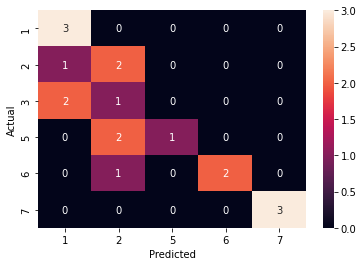

In [8]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Manhattan**

In [9]:
manh_knn = KNeighborsClassifier(n_neighbors= best_k, metric="manhattan")
manh_knn.fit(X_train, Y_train)

manh_Y_pred = manh_knn.predict(X_test)

print(classification_report(Y_test, manh_Y_pred))

print("ACCURACY:", accuracy_score(Y_test, manh_Y_pred))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.25      0.67      0.36         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.56        18
   macro avg       0.64      0.56      0.52        18
weighted avg       0.64      0.56      0.52        18

ACCURACY: 0.5555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Euclidean**

In [10]:
seq_knn = KNeighborsClassifier(n_neighbors= best_k, metric="sqeuclidean")
seq_knn.fit(X_train, Y_train)

seq_Y_pred = seq_knn.predict(X_test)

print(classification_report(Y_test, seq_Y_pred))

print("ACCURACY:", accuracy_score(Y_test, seq_Y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.61        18
   macro avg       0.64      0.61      0.57        18
weighted avg       0.64      0.61      0.57        18

ACCURACY: 0.6111111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
if accuracy_score(Y_test, seq_Y_pred) > accuracy_score(Y_test, manh_Y_pred) :
  print("From the two comparisons we can come to the conclusion that the ACCURACY of squared euclidean is better than manhattan as distance metrics for the predictions.")
else:
  print("From the two comparisons we can come to the conclusion that the ACCURACY of manhattan is better than squared euclidean as distance metrics for the predictions.")

From the two comparisons we can come to the conclusion that the ACCURACY of squared euclidean is better than manhattan as distance metrics for the predictions.
